Nepal GIS Assignment

In [1]:
# installing all the required libraries
!pip install -r "requirements.txt"

Load Necessary Libraries

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from rasterio.mask import mask
import fiona
import seaborn as sns

In [ ]:
import sys
print(sys.executable)

Load Local Government Shapefile of Nepal 

In [4]:
# Shapefile path
path = "data/vector/local_unit.shp"
gdf = gpd.read_file(path)
gdf

,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,TAPLEJUNG,Maiwakhola,Gaunpalika,1,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,TAPLEJUNG,Meringden,Gaunpalika,1,"POLYGON ((87.51272 27.56894, 87.51255 27.56859..."
3,1,TAPLEJUNG,Mikwakhola,Gaunpalika,1,"POLYGON ((87.6885 27.70975, 87.68891 27.70938,..."
4,1,TAPLEJUNG,Phaktanglung,Gaunpalika,1,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."
...,...,...,...,...,...,...
772,4,NAWALPARASI_E,Chitawan National Park,National Park,Gandaki,"POLYGON ((84.32537 27.68957, 84.32562 27.6894,..."
773,5,RUKUM_E,Bhume,Gaunpalika,5,"POLYGON ((82.65382 28.65759, 82.65428 28.65724..."
774,5,RUKUM_E,Putha Uttarganga,Gaunpalika,5,"POLYGON ((82.76718 28.80407, 82.76748 28.80383..."
775,5,RUKUM_E,Sisne,Gaunpalika,5,"POLYGON ((82.67327 28.85214, 82.67373 28.85205..."


#chaeck crs of shapefile
print("\nCRS:: \n" , gdf.crs)

Pre Processing

In [5]:
# Counting the missing values in each columns
print(gdf.isnull().sum()) 

STATE_CODE    0
DISTRICT      0
GaPa_NaPa     0
Type_GN       0
Province      0
geometry      0
dtype: int64


Visualization

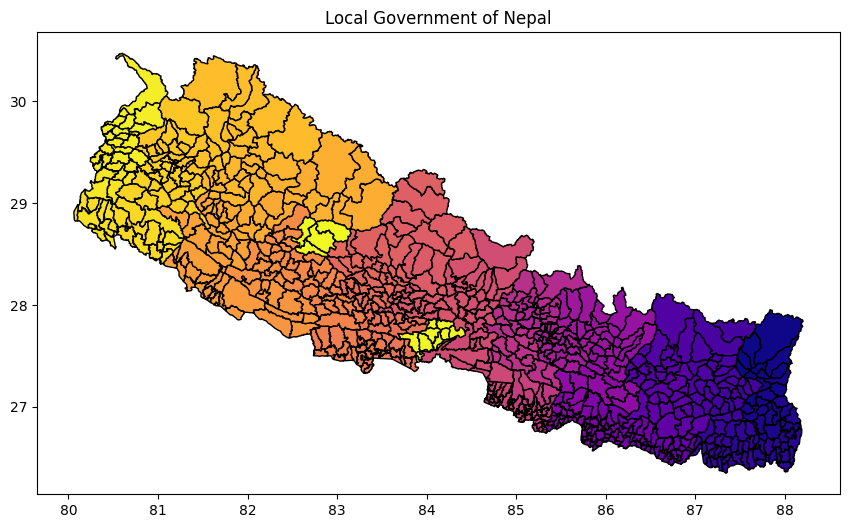

In [6]:
# visualization of shapefile of Nepal
gdf.plot(figsize=(12, 6), cmap="plasma", edgecolor="black")
plt.title("Local Government of Nepal")
plt.show()

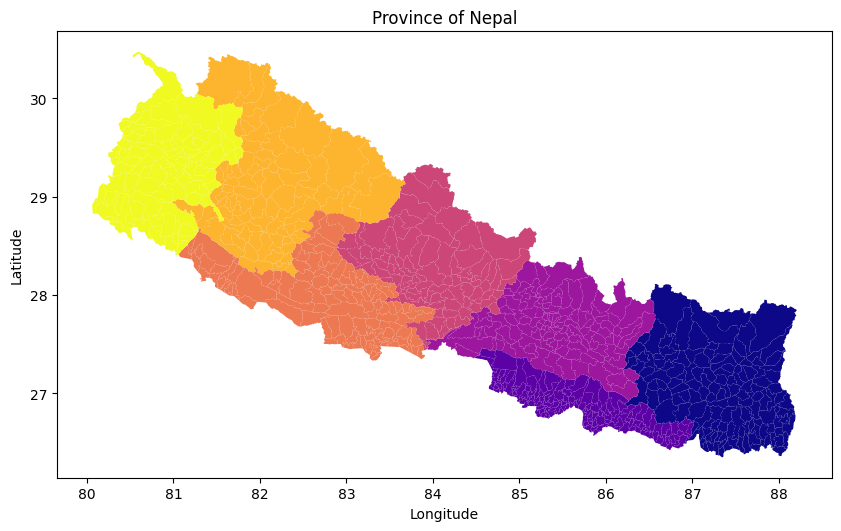

In [7]:
# Province of Nepal Visualization
gdf.plot(column="STATE_CODE", cmap="plasma", legend=False, figsize=(10, 6))
plt.title("Province of Nepal")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [8]:
print(gdf.columns)
print(gdf.dtypes)
print(gdf["DISTRICT"].isnull().sum())  # Check if there are missing values

Index(['STATE_CODE', 'DISTRICT', 'GaPa_NaPa', 'Type_GN', 'Province',
       'geometry'],
      dtype='object')
STATE_CODE       int32
DISTRICT        object
GaPa_NaPa       object
Type_GN         object
Province        object
geometry      geometry
dtype: object
0


Dissolve for visualization in district

Index(['DISTRICT', 'geometry', 'STATE_CODE', 'GaPa_NaPa', 'Type_GN',
       'Province'],
      dtype='object')


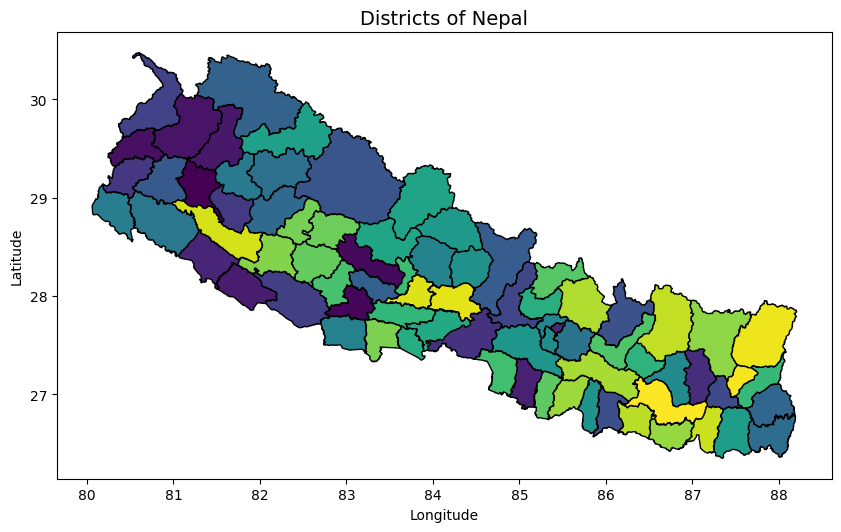

In [9]:
# Dissolve by "DISTRICT" to remove local unit boundaries
districts = gdf.dissolve(by="DISTRICT").reset_index()

# Check the columns to ensure 'DISTRICT' is now a column after dissolving
print(districts.columns)

# Plot only district boundaries
fig, ax = plt.subplots(figsize=(10, 6))
districts.plot(column="DISTRICT", cmap="viridis", edgecolor="black", legend=False, ax=ax)

# Add title and labels
plt.title("Districts of Nepal", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()


In [10]:
# Check the CRS of the GeoDataFrame
print(gdf.crs)

GEOGCS["NepalDD",DATUM["D_Everest_Bangladesh",SPHEROID["Everest 1830 (1937 Adjustment)",6377276.345,300.8017,AUTHORITY["EPSG","7015"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [11]:
# Check the CRS of the GeoDataFrame
print(districts.crs)

GEOGCS["NepalDD",DATUM["D_Everest_Bangladesh",SPHEROID["Everest 1830 (1937 Adjustment)",6377276.345,300.8017,AUTHORITY["EPSG","7015"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


Calculate the area and visualization in the districtwise area

C:\Users\Abin\AppData\Local\Temp\ipykernel_18040\3207832658.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  districts['area'] = districts.geometry.area


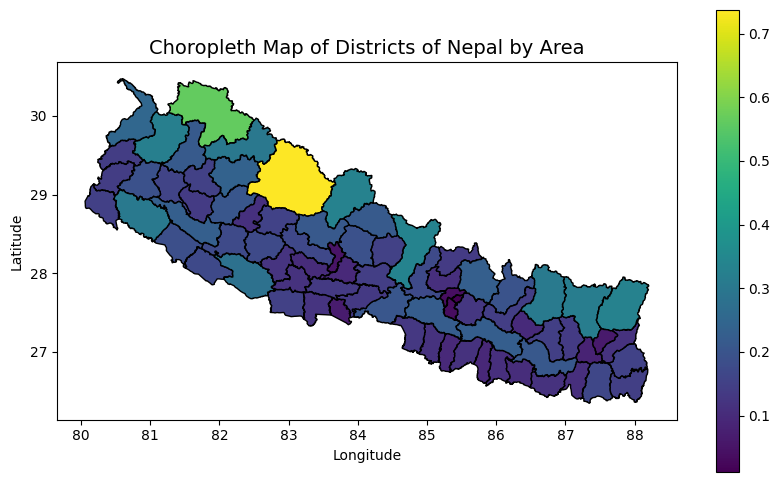

In [12]:
#visualization of the nepal's district in areawise
districts['area'] = districts.geometry.area

# Step 3: Plot the choropleth map using the area as the column
fig, ax = plt.subplots(figsize=(10, 6))
districts.plot(column='area', cmap='viridis', legend=True, ax=ax, edgecolor='black')

# Add title and labels
plt.title("Choropleth Map of Districts of Nepal by Area", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()

Raster Visualization

In [13]:
#Create raster file path
temp_path_2020 = "data/raster/nepal_temperature_2020.tif"
temp_path_2050 = "data/raster/nepal_temperature_2050.tif"

preci_path_2020 = "data/raster/nepal_precipitation_2020.tif"
preci_path_2050 = "data/raster/nepal_precipitation_2050.tif"


In [26]:
# Loadraster image
with rasterio.open(temp_path_2020) as src:
    temp_2020 = src.read(1)  # Read the first band as a NumPy array
with rasterio.open(temp_path_2050) as src:
    temp_2050 = src.read(1)  # Read the first band as a NumPy array
with rasterio.open(preci_path_2020) as src:
    preci_2020 = src.read(1)  # Read the first band as a NumPy array
with rasterio.open(preci_path_2020) as src:
    preci_2050 = src.read(1)  # Read the first band as a NumPy array

Raster Visualization

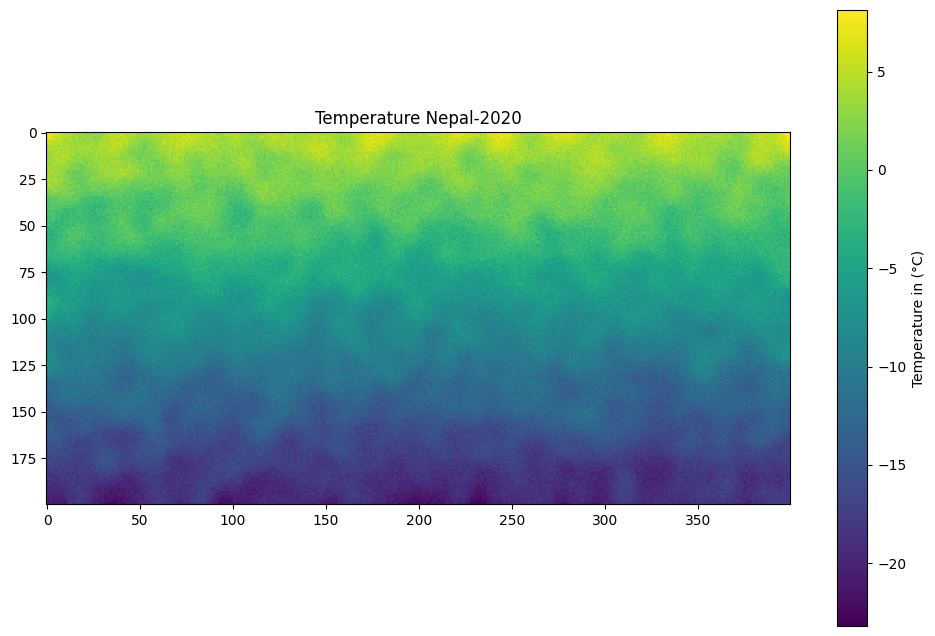

In [33]:
plt.figure(figsize=(12, 8))
plt.imshow(temp_2020, cmap="viridis", interpolation="nearest")
plt.colorbar(label="Temperature in (°C)")
plt.title("Temperature Nepal-2020")
plt.show()

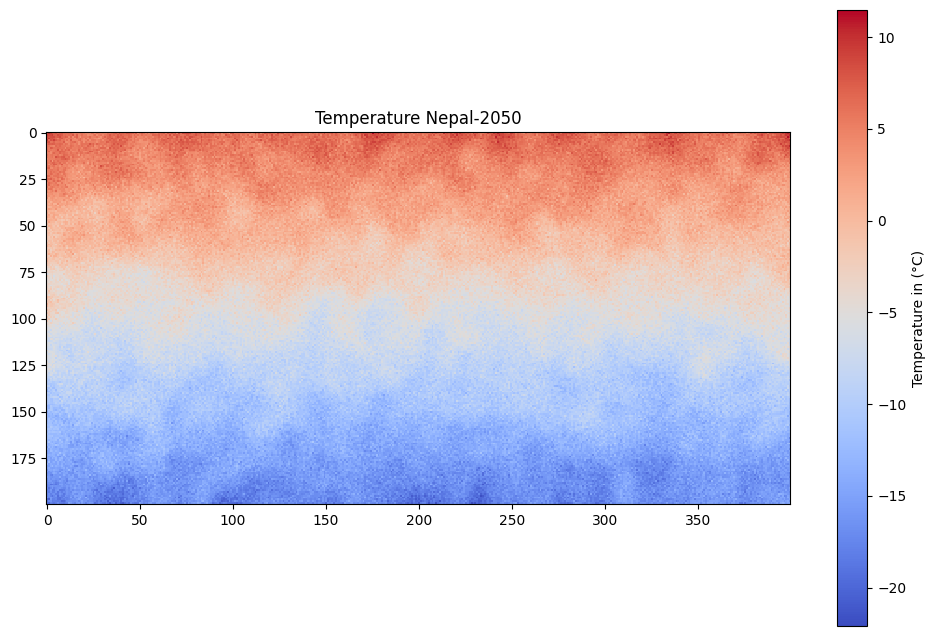

In [34]:
plt.figure(figsize=(12, 8))
plt.imshow(temp_2050, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Temperature in (°C)")
plt.title("Temperature Nepal-2050")
plt.show()

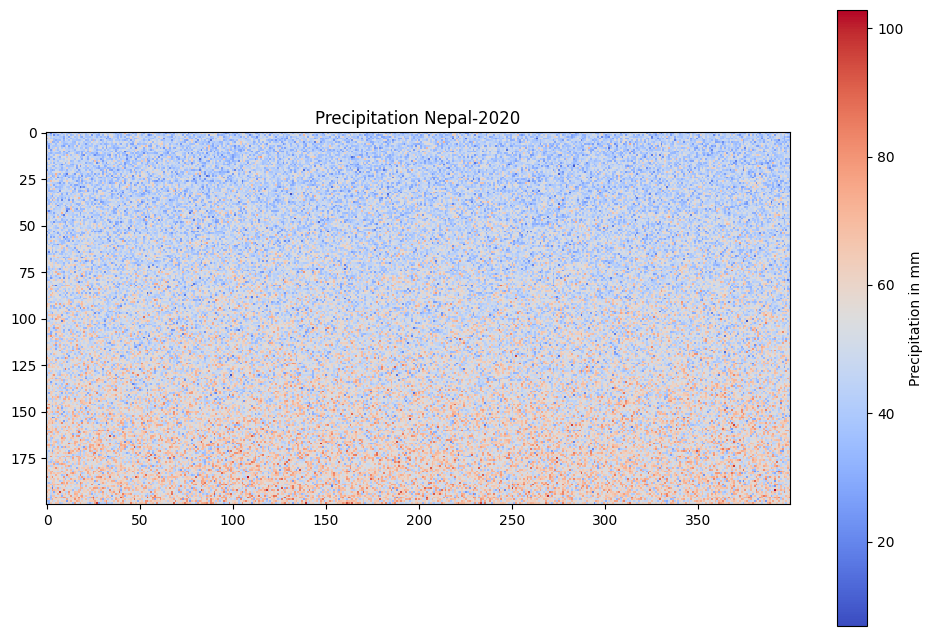

In [35]:
plt.figure(figsize=(12, 8))
plt.imshow(preci_2020, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Precipitation in mm")
plt.title("Precipitation Nepal-2020")
plt.show()

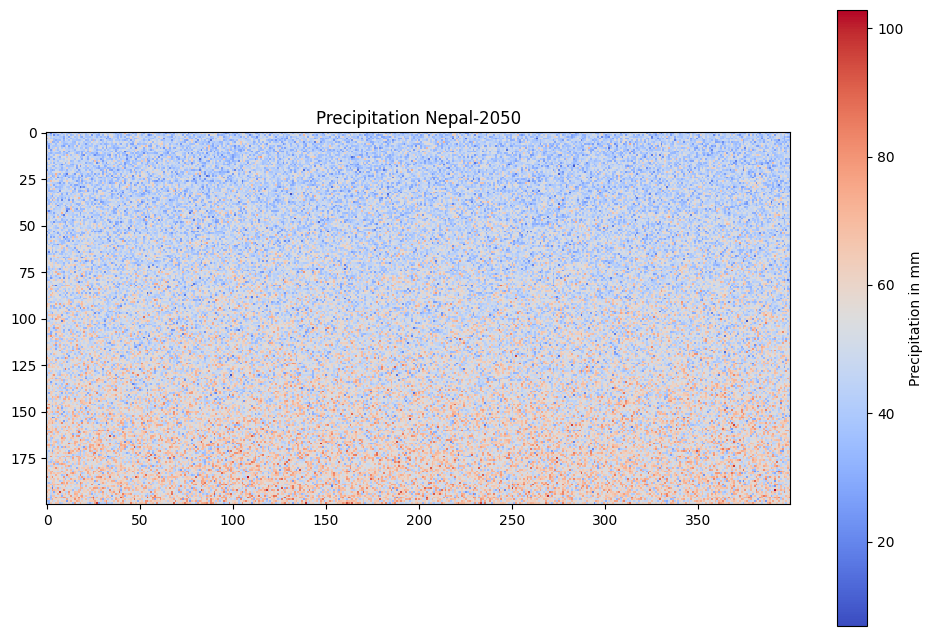

In [36]:
plt.figure(figsize=(12, 8))
plt.imshow(preci_2050, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Precipitation in mm")
plt.title("Precipitation Nepal-2050")
plt.show()

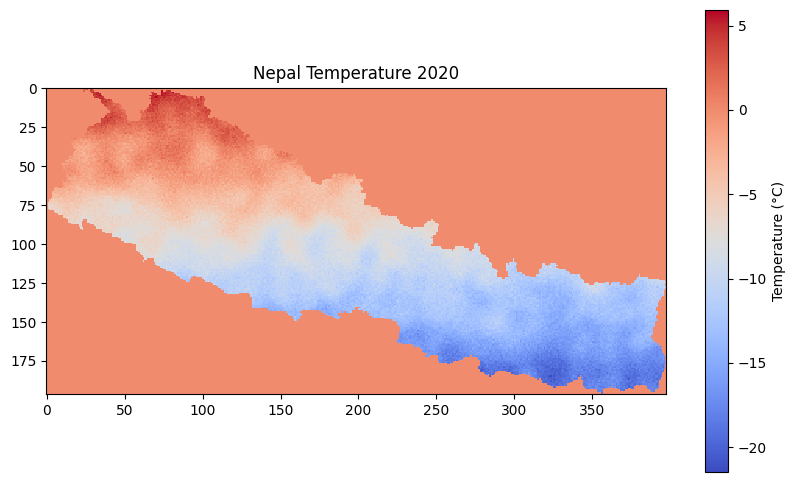

In [42]:

with rasterio.open(temp_path_2020) as src:
    raster_crs = src.crs  # Get raster CRS
    
    if gdf.crs != raster_crs:
        path = gdf.to_crs(raster_crs)
    
    shapes = [feature["geometry"] for feature in path.to_crs(raster_crs).__geo_interface__["features"]]
    
    clipped_raster, clipped_transform = mask(src, shapes, crop=True)
    
    clipped_meta = src.meta.copy()
    clipped_meta.update({
        "transform": clipped_transform,
        "width": clipped_raster.shape[2],
        "height": clipped_raster.shape[1]
    })

clipped_raster_path = "data/raster/nepal_temperature_2020_clipped.tif"
with rasterio.open(clipped_raster_path, "w", **clipped_meta) as dst:
    dst.write(clipped_raster)

plt.figure(figsize=(10, 6))
plt.imshow(clipped_raster[0], cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Temperature (°C)")
plt.title("Nepal Temperature 2020")
plt.show()

GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]
GEOGCS["NepalDD",DATUM["D_Everest_Bangladesh",SPHEROID["Everest 1830 (1937 Adjustment)",6377276.345,300.8017,AUTHORITY["EPSG","7015"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


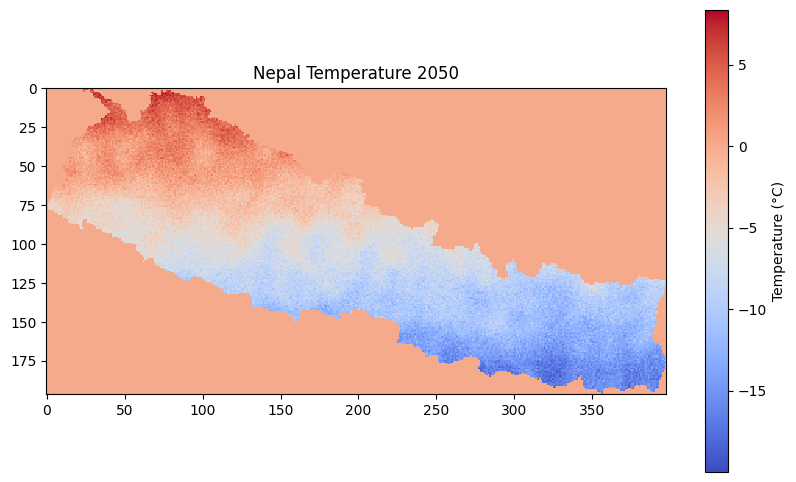

In [54]:

with rasterio.open(temp_path_2050) as src:
    raster_crs = src.crs  # Get raster CRS
    print(raster_crs)
    print(gdf.crs)

    if gdf.crs != raster_crs:
        path = gdf.to_crs(raster_crs)
    
    shapes = [feature["geometry"] for feature in path.to_crs(raster_crs).__geo_interface__["features"]]
    
    clipped_raster, clipped_transform = mask(src, shapes, crop=True)
    
    clipped_meta = src.meta.copy()
    clipped_meta.update({
        "transform": clipped_transform,
        "width": clipped_raster.shape[2],
        "height": clipped_raster.shape[1]
    })

clipped_raster_path = "data/raster/nepal_temperature_2020_clipped.tif"
with rasterio.open(clipped_raster_path, "w", **clipped_meta) as dst:
    dst.write(clipped_raster)

plt.figure(figsize=(10, 6))
plt.imshow(clipped_raster[0], cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Temperature (°C)")
plt.title("Nepal Temperature 2050")
plt.show()

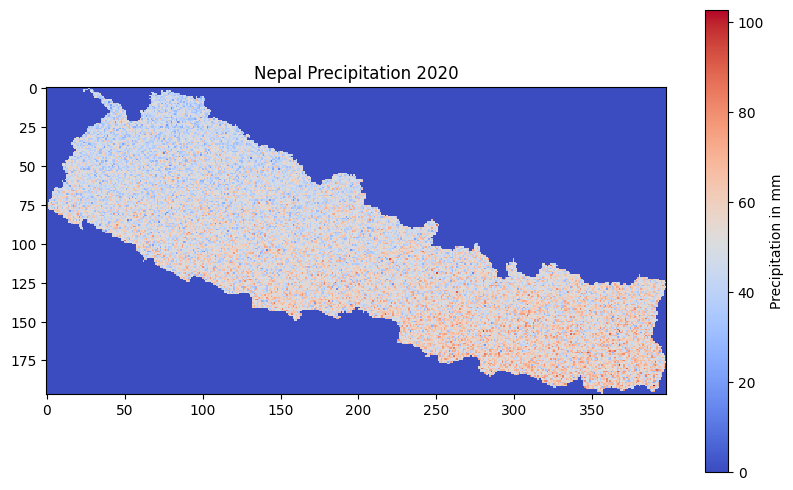

In [55]:


with rasterio.open(preci_path_2020) as src:
    raster_crs = src.crs  # Get raster CRS
    
    if gdf.crs != raster_crs:
        path = gdf.to_crs(raster_crs)
    
    shapes = [feature["geometry"] for feature in path.to_crs(raster_crs).__geo_interface__["features"]]
    
    clipped_raster, clipped_transform = mask(src, shapes, crop=True)
    
    clipped_meta = src.meta.copy()
    clipped_meta.update({
        "transform": clipped_transform,
        "width": clipped_raster.shape[2],
        "height": clipped_raster.shape[1]
    })

clipped_raster_path = "data/raster/nepal_precipitation_2020_clipped.tif"
with rasterio.open(clipped_raster_path, "w", **clipped_meta) as dst:
    dst.write(clipped_raster)

plt.figure(figsize=(10, 6))
plt.imshow(clipped_raster[0], cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Precipitation in mm")
plt.title("Nepal Precipitation 2020")
plt.show()

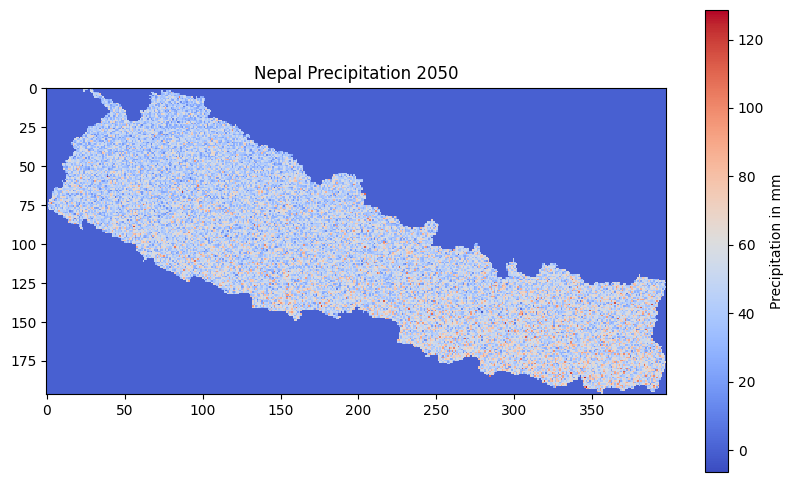

In [56]:

with rasterio.open(preci_path_2050) as src:
    raster_crs = src.crs  # Get raster CRS
    
    if gdf.crs != raster_crs:
        path = gdf.to_crs(raster_crs)
    
    shapes = [feature["geometry"] for feature in path.to_crs(raster_crs).__geo_interface__["features"]]
    
    clipped_raster, clipped_transform = mask(src, shapes, crop=True)
    
    clipped_meta = src.meta.copy()
    clipped_meta.update({
        "transform": clipped_transform,
        "width": clipped_raster.shape[2],
        "height": clipped_raster.shape[1]
    })

clipped_raster_path = "data/raster/nepal_precipitation_2020_clipped.tif"
with rasterio.open(clipped_raster_path, "w", **clipped_meta) as dst:
    dst.write(clipped_raster)

plt.figure(figsize=(10, 6))
plt.imshow(clipped_raster[0], cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Precipitation in mm")
plt.title("Nepal Precipitation 2050")
plt.show()


📌 Precipitation Statistics of 2020:
Mean: 50.84
Median: 50.37
Min: 6.86
Max: 102.83

📌 Temperature Statistics of 2020:
Mean: -7.58
Median: -7.69
Min: -23.20
Max: 8.14


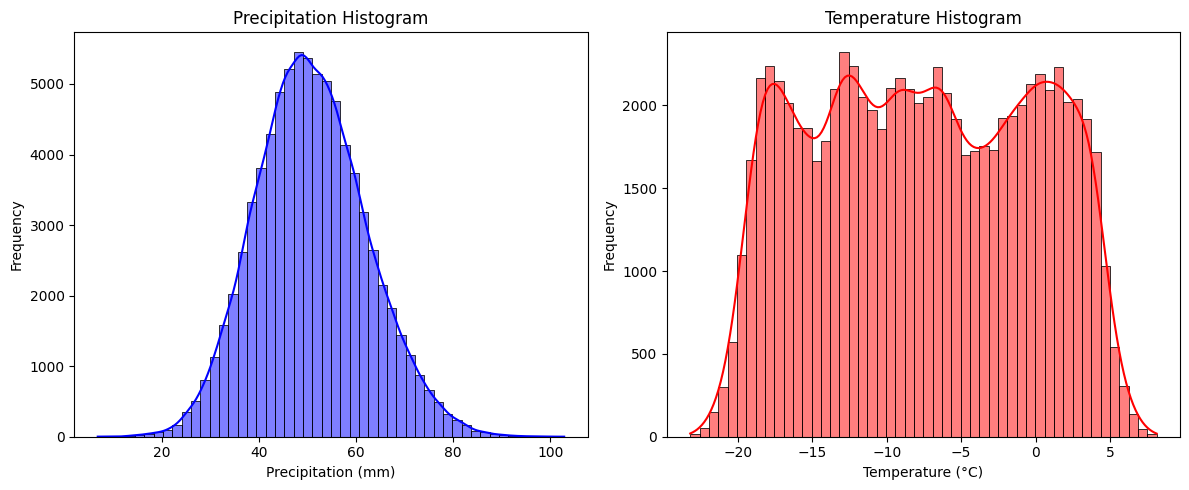

In [62]:

# Function to compute basic statistics
def compute_statistics(data):
    return {
        "Mean": np.nanmean(data),
        "Median": np.nanmedian(data),
        "Min": np.nanmin(data),
        "Max": np.nanmax(data)
    }

# Function to load raster data
def load_raster(path):
    with rasterio.open(path) as src:
        data = src.read(1)  # Read first band
        data[data == src.nodata] = np.nan  # Handle NoData values
    return data

# Load raster datasets
precip_data = load_raster(preci_path_2020)
temp_data = load_raster(temp_path_2020)

# Compute statistics
precip_stats = compute_statistics(precip_data)
temp_stats = compute_statistics(temp_data)

# Print statistics
print("\n📌 Precipitation Statistics of 2020:")
for key, value in precip_stats.items():
    print(f"{key}: {value:.2f}")

print("\n📌 Temperature Statistics of 2020:")
for key, value in temp_stats.items():
    print(f"{key}: {value:.2f}")

# Visualization: Histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(precip_data[~np.isnan(precip_data)].flatten(), bins=50, kde=True, color="blue")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Frequency")
plt.title("Precipitation Histogram")

plt.subplot(1, 2, 2)
sns.histplot(temp_data[~np.isnan(temp_data)].flatten(), bins=50, kde=True, color="red")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Temperature Histogram")

plt.tight_layout()
plt.show()




📌 Precipitation Statistics of 2050:
Mean: 48.29
Median: 46.74
Min: -6.41
Max: 134.97

📌 Temperature Statistics of 2050:
Mean: -5.47
Median: -5.58
Min: -22.09
Max: 11.47


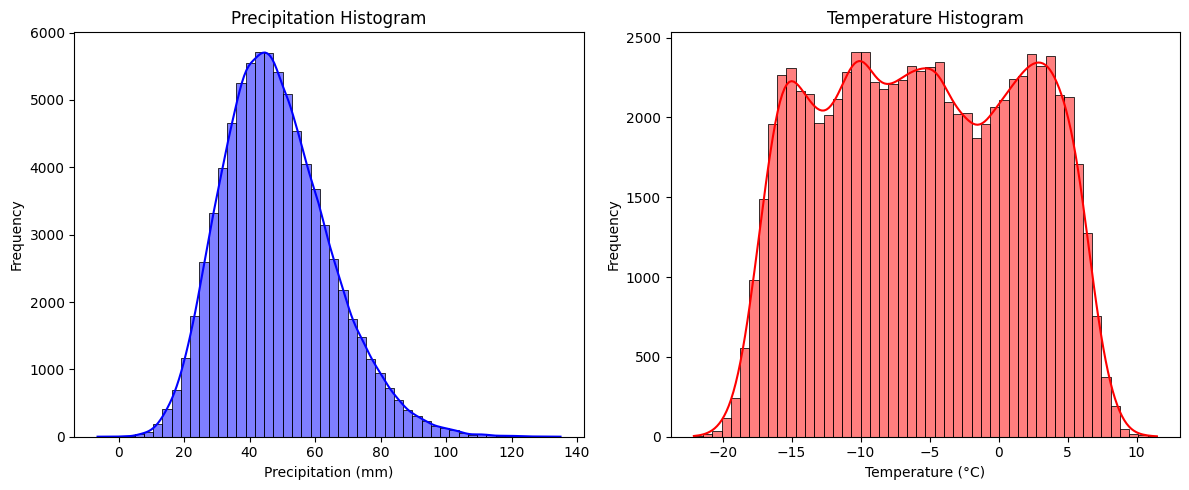

In [61]:

# Function to compute basic statistics
def compute_statistics(data):
    return {
        "Mean": np.nanmean(data),
        "Median": np.nanmedian(data),
        "Min": np.nanmin(data),
        "Max": np.nanmax(data)
    }

# Function to load raster data
def load_raster(path):
    with rasterio.open(path) as src:
        data = src.read(1)  # Read first band
        data[data == src.nodata] = np.nan  # Handle NoData values
    return data

# Load raster datasets
precip_data = load_raster(preci_path_2050)
temp_data = load_raster(temp_path_2050)

# Compute statistics
precip_stats = compute_statistics(precip_data)
temp_stats = compute_statistics(temp_data)

# Print statistics
print("\n📌 Precipitation Statistics of 2050:")
for key, value in precip_stats.items():
    print(f"{key}: {value:.2f}")

print("\n📌 Temperature Statistics of 2050:")
for key, value in temp_stats.items():
    print(f"{key}: {value:.2f}")

# Visualization: Histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(precip_data[~np.isnan(precip_data)].flatten(), bins=50, kde=True, color="blue")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Frequency")
plt.title("Precipitation Histogram")

plt.subplot(1, 2, 2)
sns.histplot(temp_data[~np.isnan(temp_data)].flatten(), bins=50, kde=True, color="red")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Temperature Histogram")

plt.tight_layout()
plt.show()



Conclusion:

The mean temperature of nepal increases from -7.58(2020) to -5.47C(2050) and the average precipitation decreases from 50.84(20 to 48.29 